# 6610402230 ศิริสุข ทานธรรม 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# 1. เปิดไฟล์ players.csv ขึ้นมาเพื่อใช้ในแบบฝึกหัดนี้ (อย่าลืมตัดคอลัมน์ว่างออกด้วย) จากนั้นให้หารค่าในคอลัมน์ shots, passes, tackles, และ saves ด้วยจำนวนนาทีของผู้เล่นคนนั้น เพื่อการเปรียบเทียบที่เท่าเทียมกัน และทำให้ตำแหน่ง (position) เป็น Category ที่เรียงลำดับจาก goalkeeper, defender,midfielder, forward

In [3]:
df = pd.read_csv('players.csv')
df = df.loc[:,:'saves']
df

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2
...,...,...,...,...,...,...,...,...
590,Holden,USA,midfielder,4,0,2,0,0
591,Howard,USA,goalkeeper,390,0,81,0,14
592,Jozy Altidore,USA,forward,356,8,84,2,0
593,Onyewu,USA,defender,170,1,69,2,0


In [4]:
df.shots /= df.minutes
df.passes /= df.minutes
df.tackles /= df.minutes
df.saves /= df.minutes

In [10]:
df.position = pd.Categorical(df.position,categories=['goalkeeper', 'defender',
'midfielder', 'forward'], ordered=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   surname   595 non-null    object  
 1   team      595 non-null    object  
 2   position  595 non-null    category
 3   minutes   595 non-null    int64   
 4   shots     595 non-null    float64 
 5   passes    595 non-null    float64 
 6   tackles   595 non-null    float64 
 7   saves     595 non-null    float64 
dtypes: category(1), float64(4), int64(1), object(2)
memory usage: 33.4+ KB


In [12]:
df.position

0      midfielder
1        defender
2      midfielder
3        defender
4      goalkeeper
          ...    
590    midfielder
591    goalkeeper
592       forward
593      defender
594    midfielder
Name: position, Length: 595, dtype: category
Categories (4, object): ['goalkeeper' < 'defender' < 'midfielder' < 'forward']

# 2. แสดงแผนภาพการกระจายตัวแบบ probability density function ของการส่งลูก (passes) ของผู้เล่นทุกคน

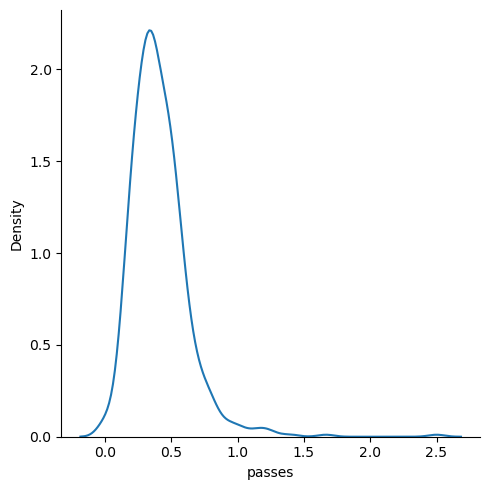

In [14]:
sns.displot(df,x=df.passes,kind='kde')

# 3. แสดง histogram ของการยิงประตู (shots) ของผู้เล่นทีม USA

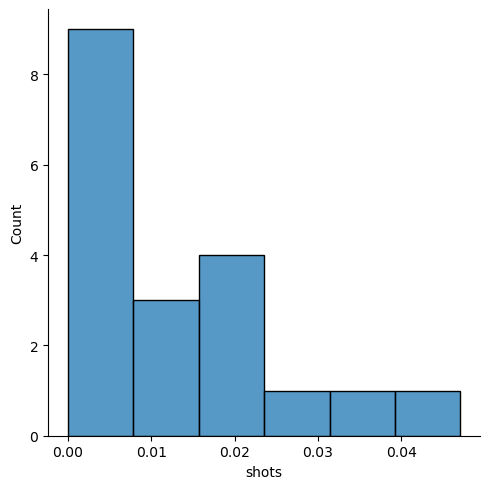

In [19]:
sns.displot(df[df.team == 'USA'],x='shots',kind='hist')

# 4. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นทุกคน

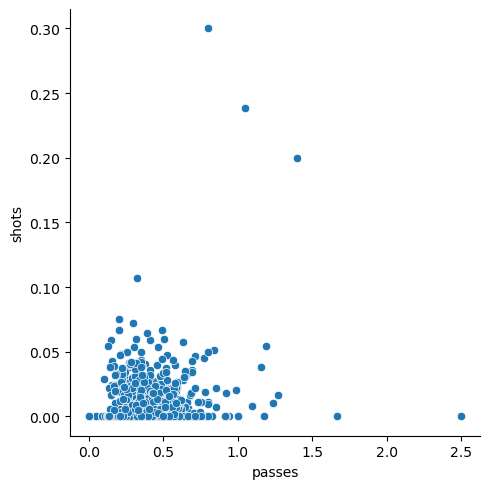

In [20]:
sns.relplot(x=df.passes,y=df.shots,kind='scatter')

# 5. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นที่ม Brazil,Spain, USA โดยให้แยกสีระหว่างผู้เล่นแต่ละทีม และแยกสัญลักษณ์ระหว่างตำแหน่งการเล่นด้วย

In [28]:
df_bsu = df.loc[df.team.str.contains('Brazil|Spain|USA')]
df_bsu.team.unique()

array(['Brazil', 'Spain', 'USA'], dtype=object)

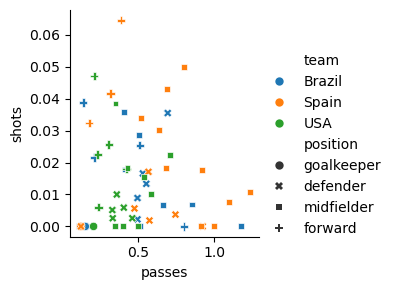

In [35]:
sns.relplot(df_bsu,x='passes',y='shots',hue='team',style='position',height=3)

# 6. แสดง relation plot แบบ scatter plot ระหว่าง tackles (แกน x) กับ shots (แกน y) ของผู้เล่นทีม Brazil,Spain, USA แต่แสดงเป็นแบบ Grid โดยให้แถวแยกตามตำแหน่งผู้เล่น คอลัมน์แยกตามทีม

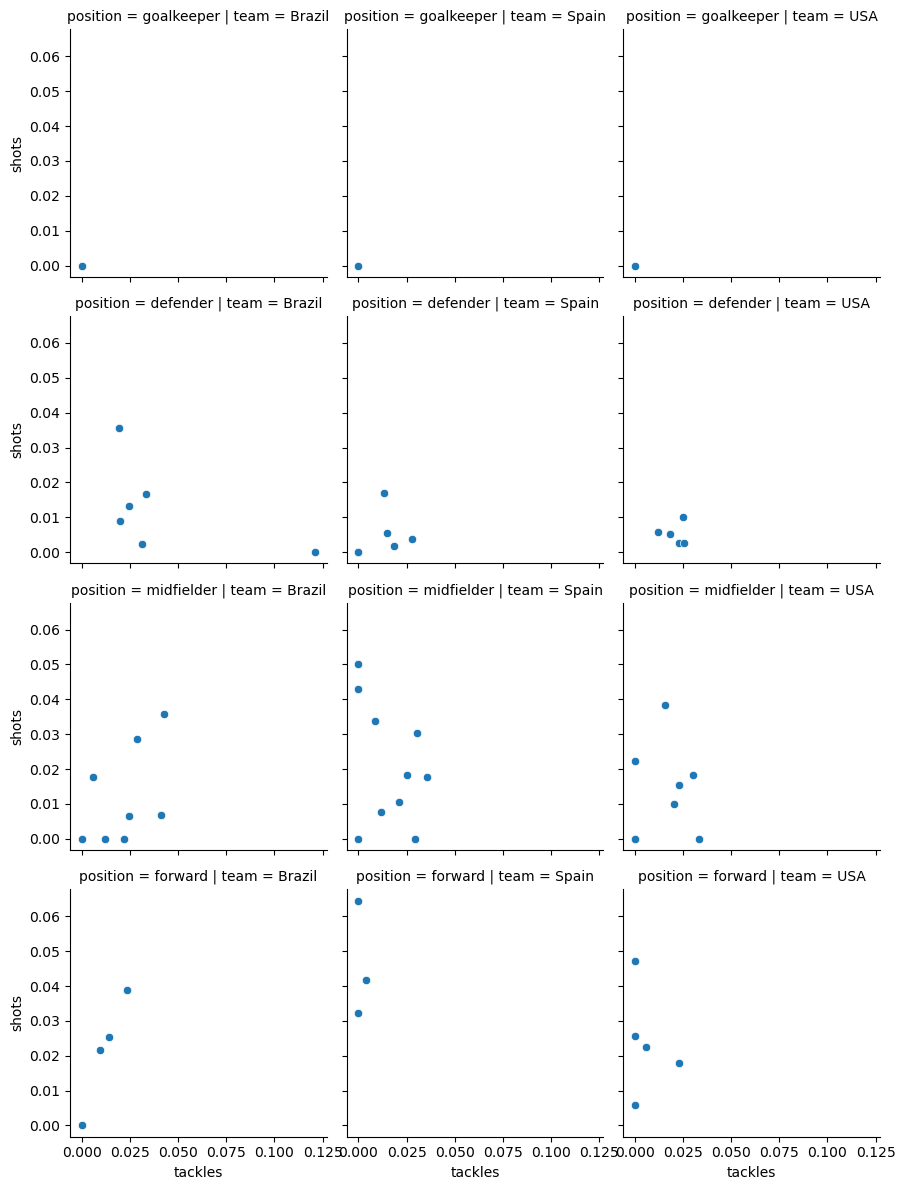

In [36]:
sns.relplot(df_bsu,x='tackles',y='shots',col='team',row='position',height=3)

# 7. แสดง Boxplot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA

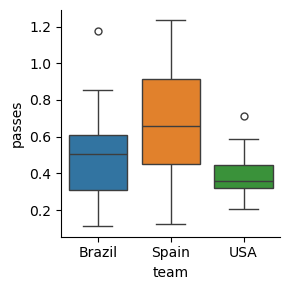

In [40]:
sns.catplot(df_bsu,x='team',y='passes',kind='box',hue='team',height=3)

# 8. แสดง swarm ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA แยกสีตามตำแหน่ง

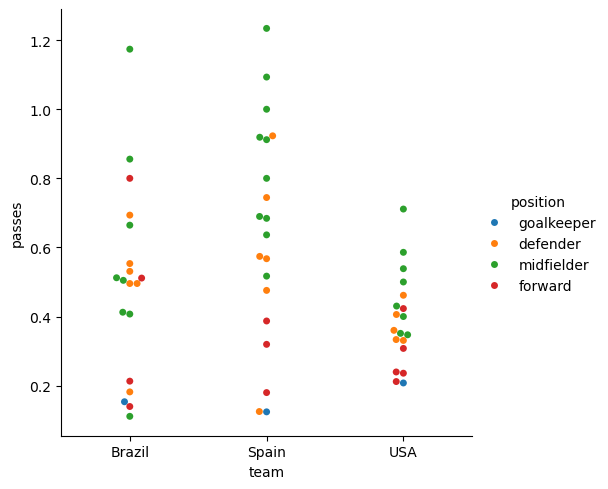

In [42]:
sns.catplot(df_bsu,x='team',y='passes',kind='swarm',hue='position')

# 9. แสดงกราฟแท่ง (bar) ของการสกัดลูก (tackles) ของผู้เล่นทีม Brazil, Spain, USA แต่ละตำแหน่ง แยกสีตามทีม

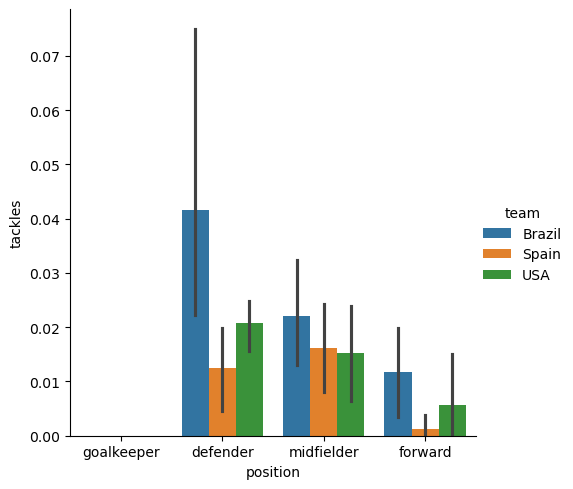

In [45]:
sns.catplot(df_bsu,x='position',y='tackles',kind='bar',hue='team')

# 10. แสดง scatter plot ของผลรวมค่า passes (เป็นแกน x) กับผลรวมค่า shots (แกน y) ของผู้เล่นทุกคนในทีม 'Brazil','Japan','USA','Spain','Algeria','France','England','South Korea' แยกสีตามทีม

In [47]:
df_bjusafes = df.loc[df.team.str.contains('Brazil|Japan|USA|Spain|Algeria|France|England|South Korea')]
df_bjusafes.team.unique()

array(['Algeria', 'Brazil', 'England', 'France', 'Japan', 'South Korea',
       'Spain', 'USA'], dtype=object)

<Axes: xlabel='passes', ylabel='shots'>

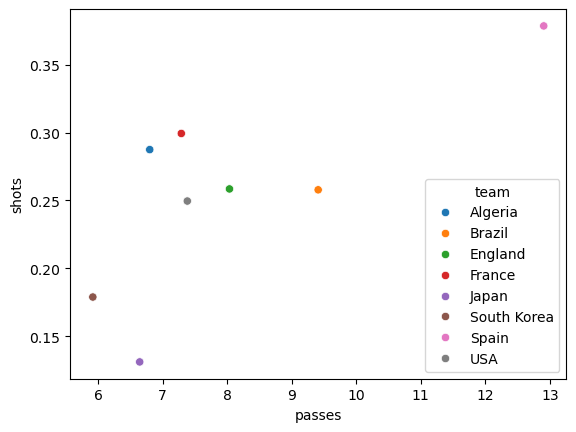

In [72]:
sns.scatterplot(df_bjusafes.groupby('team').agg({'passes': 'sum', 'shots': 'sum'}), x='passes', y='shots', hue='team')

# 11. แสดง distribution plot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA รวมในกราฟเดียวกัน แยกสีตามทีม

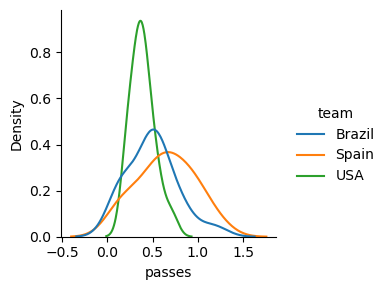

In [73]:
sns.displot(df_bsu,x='passes',kind='kde',hue='team',height=3)